### Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline

### Obtaining Data

We aim to predict the purchasing behaviour of people whom have been subject to a social media marketing advertisement campaign. 

In [3]:
# Load the data into a pandas dataframe  
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Check the shape of the data

In [4]:
data.shape

(400, 5)

Check overall summary using info() and check if any missing values? 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Predicting a categorical target variable with Linear Regression

#### Exercise: 
- extract the column 'Purchased' as target variable
- put in a variable 'y'

In [7]:
y = data.loc[:,"Purchased"]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

#### Exercise: 
- extract the columns of input variables, a slice from column "Gender" to column "EstimatedSalary"
- put in a variable 'x_orig'

In [8]:
x_orig = data.loc[:, "Gender":"EstimatedSalary"]
x_orig.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


#### Detour: Encoding Non-Numeric Variables

Note that the `Gender` column is a categorical variable. For scikit-learn library's LinearRegression(), this is problematic as the data must be entirely numeric.

Let's convert the values to 0 or 1. This is known as *encoding*.

- Male is transformed to 0
- Female is represented by 1

In [9]:
# make a copy of the original dataframe before encoding
x_encoded = x_orig.copy() 
x_encoded.loc[:,"Gender"] = (x_encoded.loc[:,"Gender"] == "Female").astype(int)
x_encoded.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


Let's now visualise the data comparing each category of "Purchased" against the input values

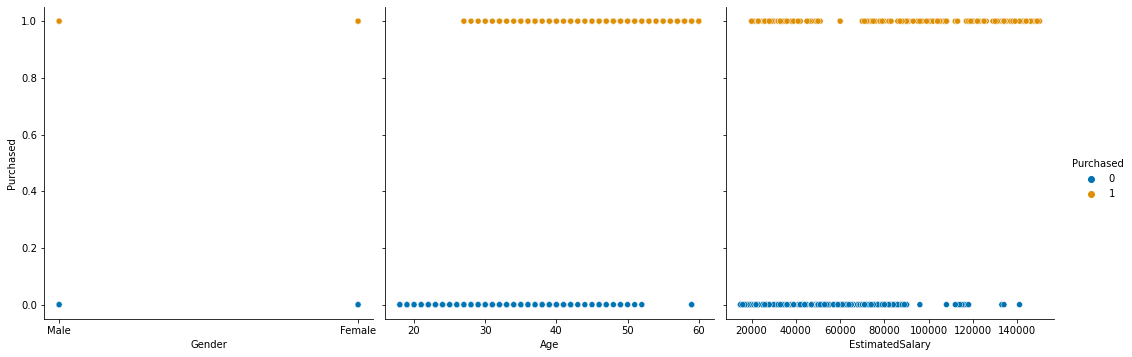

In [10]:
sns.pairplot(data,hue="Purchased",palette="colorblind", 
             x_vars = x_encoded.columns, y_vars = ["Purchased"], 
             height = 5, diag_kind=None)

Observation

- people might be more likely to purchase the insurance if they are older and have a higher salary
- The plot for `Gender` does not give any insight

#### Detour: Scaling Variables

EstimatedSalary variable is much larger in magnitude compared to other numerical variables. Having such a large disparity may cause computational issues. Let's scale the EstimatedSalary variable so that the magnitudes are similar.

A simple way would be to just divide it by a constant value. There are much better methods of scaling but beyond our scope.

In [11]:
# Scale the values of EstimatedSalary by 1000
x_encoded.loc[:,"EstimatedSalary"] = x_encoded.loc[:,"EstimatedSalary"] / 1000

In [12]:
x_encoded.head()

,Gender,Age,EstimatedSalary
0,0,19,19.0
1,0,35,20.0
2,1,26,43.0
3,1,27,57.0
4,0,19,76.0


### Binary Classification using Linear Regression

#### Separate the data set into train vs. test subsets

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=12345)

# random_state is a seed used to take the random sample
# Fixing the random_state will ensure that the 'random' sampling gives 
# the same training and testing data set each time the code is run

In [14]:
x_train.head()

,Gender,Age,EstimatedSalary
262,1,55,125.0
3,1,27,57.0
298,0,45,79.0
292,0,55,39.0
75,0,34,112.0


In [15]:
x_test.head()

,Gender,Age,EstimatedSalary
378,0,41,87.0
175,1,23,28.0
396,0,51,23.0
213,0,35,58.0
110,1,39,71.0


#### Fit the data to a Linear Regression model

Option 1: Use LinearRegression() from `scikit-learn`

In [16]:
from sklearn.linear_model import LinearRegression, LogisticRegression
linreg_sk = LinearRegression()
linreg_sk.fit(x_train, y_train)
print(linreg_sk.intercept_, linreg_sk.coef_)

-0.9308654175794675 [0.02676578 0.02628559 0.00370859]


Option 2: Use ols() from `statsmodels.formula.api`

Combine x_train and y_train as one DataFrame first 

In [17]:
import statsmodels.formula.api as smf
train_data_set = pd.concat([x_train, y_train], axis=1)
train_data_set.head()

,Gender,Age,EstimatedSalary,Purchased
262,1,55,125.0,1
3,1,27,57.0,0
298,0,45,79.0,0
292,0,55,39.0,1
75,0,34,112.0,1


#### Exercise:
- use `smf.ols` to train the model
- show summary

In [18]:
model = smf.ols('Purchased ~ Gender + Age + EstimatedSalary', data=train_data_set) 
# 'Purchased ~ Gender + Age + EstimatedSalary' means:
# y is the column 'Purchased'
# x (input variables) are column 'Gender', 'Age', 'EstimatedSalary'
# 'data=' means: data is a fixed parameter name, which is waiting to be assigned to a variable containing a dataframe
# the dataframe that will be assigned to parameter data is inside variable train_data_set
linreg_ols = model.fit()
print(linreg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              Purchased   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     84.90
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           6.07e-39
Time:                        15:14:13   Log-Likelihood:                -94.951
No. Observations:                 280   AIC:                             197.9
Df Residuals:                     276   BIC:                             212.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.9309      0.082    -

We use option 2 `smf.ols()` model for prediction of y

In [19]:
linreg_ols_pred_train = linreg_ols.predict(x_train)
linreg_ols_pred_test = linreg_ols.predict(x_test)

Predictions given by the Linear Regression Model are numeric

In [20]:
linreg_ols_pred_train.min()

-0.3609759363091626

How can we equate these predictions to the categorical target variable (Purchased should be 0/1)?

One method would be to plot the predictions against the target values and pick a threshold

C:\Users\hbisx\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'predicted values'),
 Text(0, 0.5, 'target values'),
 Text(0.5, 1.0, 'Predicted vs Actual Responses')]

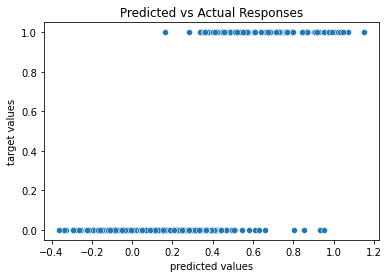

In [21]:
ax = sns.scatterplot(linreg_ols_pred_train,y_train)
ax.set(xlabel='predicted values', ylabel='target values',title="Predicted vs Actual Responses")

By eyeballing the plot above, maybe we can set threshold to 0.45.

C:\Users\hbisx\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'predicted values'),
 Text(0, 0.5, 'target values'),
 Text(0.5, 1.0, 'Predicted vs Actual Responses')]

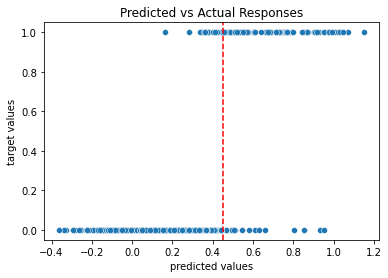

In [22]:
ax = sns.scatterplot(linreg_ols_pred_train,y_train)
plt.axvline(0.45, color="r", ls="--")
ax.set(xlabel='predicted values', ylabel='target values',title="Predicted vs Actual Responses")

We can now make the actual binary-valued prediction using our threshold:

In [23]:
# linreg_ols_pred_train > 0.45 generates a boolean Series of True/False values
# then we convert all values to 1 or 0
y_pred_train = (linreg_ols_pred_train > 0.45).astype(int)
y_pred_train

262    1
3      0
298    1
292    1
75     0
      ..
34     0
357    0
382    1
129    0
285    0
Length: 280, dtype: int32

Measure the training accuracy

In [24]:
# Measure the accuracy on the training set
acc_train = y_pred_train == y_train
print("Accuracy:", acc_train.mean())

Accuracy: 0.8857142857142857


Test this classifier on the testing data set

In [25]:
y_pred_test = (linreg_ols_pred_test > 0.45).astype(int)
acc_test = y_pred_test == y_test
print("Accuracy:", acc_test.mean())

Accuracy: 0.7916666666666666


The model performs slightly worse on the test set. Let's see a plot of the results:

C:\Users\hbisx\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


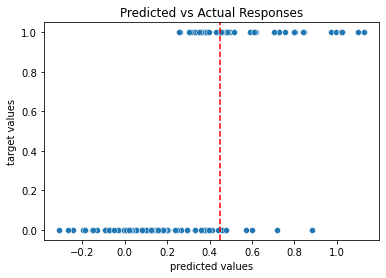

In [26]:
ax = sns.scatterplot(linreg_ols_pred_test,y_test)
plt.axvline(0.45,color="r",ls="--");
ax.set(xlabel='predicted values', ylabel='target values',title="Predicted vs Actual Responses");

Issues
- The cut-off value for regression output to be considered 1 or 0 was chosen by observation, without a guiding principle
- The Linear Regression model’s output can be (−∞,∞)

## Logistic Regression to the rescue

Plotting **sigmoid** function to see the boundaries

$$ f(z) = \frac{1}{1+e^{-z}} $$


C:\Users\hbisx\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

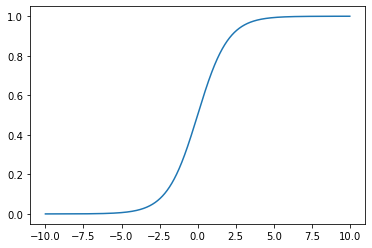

In [27]:
sigmoid_domain = np.linspace(-10, 10, num=10000)
sigmoid_range = 1/(1 + np.exp(-sigmoid_domain))
sns.lineplot(sigmoid_domain, sigmoid_range)

### Training Logistic Regression Model

Option 1: use the logistic regression model in `scikit-learn`

In [28]:
from sklearn.linear_model import LogisticRegression
logreg_sk = LogisticRegression()

logreg_sk.fit(x_train, y_train)
print(logreg_sk.intercept_, logreg_sk.coef_)

[-13.56244425] [[0.20588752 0.24902433 0.0372799 ]]


Option 2: 
#### Exercise
- use the `logit()` from `statsmodels.formula.api`
- name the model as `logreg_logit`

In [29]:
train_data_set.head()

,Gender,Age,EstimatedSalary,Purchased
262,1,55,125.0,1
3,1,27,57.0,0
298,0,45,79.0,0
292,0,55,39.0,1
75,0,34,112.0,1


In [31]:
model = smf.logit('Purchased ~ Gender + Age + EstimatedSalary', data=train_data_set)
logreg_logit = model.fit()
print(logreg_logit.summary())

Optimization terminated successfully.
         Current function value: 0.312290
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  280
Model:                          Logit   Df Residuals:                      276
Method:                           MLE   Df Model:                            3
Date:                Mon, 20 Jun 2022   Pseudo R-squ.:                  0.5087
Time:                        15:14:29   Log-Likelihood:                -87.441
converged:                       True   LL-Null:                       -177.99
Covariance Type:            nonrobust   LLR p-value:                 5.100e-39
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -13.5906      1.683     -8.073      0.000     -16.890     -10.291
Gender        

Use .predict() to obtain the prediction probability

In [77]:
prob_train = logreg_logit.predict(x_train)
prob_test = logreg_logit.predict(x_test)

print(prob_train)
print(prob_test)

262    0.993428
3      0.011010
298    0.639383
292    0.827962
75     0.281625
         ...   
34     0.029251
357    0.389581
382    0.942673
129    0.023226
285    0.340329
Length: 280, dtype: float64
378    0.468687
175    0.001390
396    0.494279
213    0.062779
110    0.271940
         ...   
90     0.006156
325    0.289648
46     0.011995
328    0.446699
51     0.000727
Length: 120, dtype: float64


Transforming the probability to 1 or 0, using threshold of 0.5

In [78]:
y_pred_train = list(map(round, prob_train))
y_pred_test = list(map(round, prob_test))

### Evaluating Logistic Regression Model
#### Accuracy

Option 1: element-wise comparisons to compare `y_pred_train` to `y_train`

In [79]:
print("Training Set Accuracy:", (y_pred_train == y_train).mean())
print("Test Set Accuracy:", (y_pred_test == y_test).mean())

Training Set Accuracy: 0.875
Test Set Accuracy: 0.7416666666666667


Option 2: use the `sklearn.metrics` module

In [80]:
from sklearn import metrics
print("Training Set Accuracy:", metrics.accuracy_score(y_train, y_pred_train))
print("Test Set Accuracy:", metrics.accuracy_score(y_test, y_pred_test))

Training Set Accuracy: 0.875
Test Set Accuracy: 0.7416666666666667


#### Limitations of Accuracy if we use it as the only metric

Let's observe the proportion of people who purchased the item in both the training and testing set

In [81]:
print(y_train.mean())
print(y_test.mean())

0.33214285714285713
0.4166666666666667


In the test set, only 42% are positive purchases. If we predict every individual did NOT purchased the insurance, the classifier is 58% accurate naturally. Hence a 74% of accuracy rate might not be too impressive.

#### The Confusion Matrix
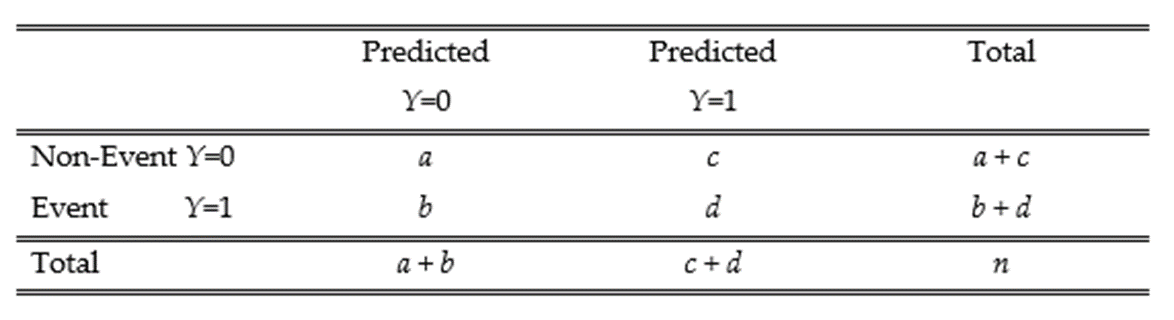

In [82]:
# first argument is true values, second argument is predicted values
cm = metrics.confusion_matrix(y_test, y_pred_test)
print(cm)

[[66  4]
 [27 23]]


Option 1: Compute the accuracy, precision and recall values from the confusion matrix **manually**

#### Exercise

In [83]:
a = cm[0, 0]
b = cm[1, 0]
c = cm[0, 1]
d = cm[1, 1]

print("Accuracy Manual:", (a + d) / (a + b + c + d))
print("Precision Manual:", d / (c + d))
print("Recall Manual:", d / (b + d))

Accuracy Manual: 0.7416666666666667
Precision Manual: 0.8518518518518519
Recall Manual: 0.46


Option 2: Sklearn Implementation

In [84]:
print("Accuracy sklearn:", metrics.accuracy_score(y_test, y_pred_test))
print("Precision sklearn:", metrics.precision_score(y_test,y_pred_test))
print("Recall sklearn:", metrics.recall_score(y_test,y_pred_test))

Accuracy sklearn: 0.7416666666666667
Precision sklearn: 0.8518518518518519
Recall sklearn: 0.46


### How changing the classification threshold might impact the metrics of a classifier

#### Having threshold of 0.80

In [85]:
threshold = 0.80
y_pred_test_high = (prob_test > threshold).astype(int)
y_pred_test_high

378    0
175    0
396    0
213    0
110    0
      ..
90     0
325    0
46     0
328    0
51     0
Length: 120, dtype: int32

Confusion matrix for threshold of 0.80

In [86]:
cm_threshold = metrics.confusion_matrix(y_test, y_pred_test_high)

print(cm_threshold)

[[68  2]
 [35 15]]


metrics for threshold of 0.80

In [87]:
print("Accuracy sklearn:", metrics.accuracy_score(y_test, y_pred_test_high))
print("Precision sklearn:", metrics.precision_score(y_test,y_pred_test_high))
print("Recall sklearn:", metrics.recall_score(y_test,y_pred_test_high))

Accuracy sklearn: 0.6916666666666667
Precision sklearn: 0.8823529411764706
Recall sklearn: 0.3


#### Having threshold of 0.30

#### Exercise

In [88]:
threshold = 0.30
y_pred_test_low = (prob_test > threshold).astype(int)
y_pred_test_low

378    1
175    0
396    1
213    0
110    0
      ..
90     0
325    0
46     0
328    1
51     0
Length: 120, dtype: int32

Confusion matrix for threshold of 0.30

In [89]:
cm_lower_threshold = metrics.confusion_matrix(y_test,y_pred_test_low)
print(cm_lower_threshold)

[[61  9]
 [16 34]]


metrics for threshold of 0.30

In [90]:
print("Accuracy sklearn:", metrics.accuracy_score(y_test, y_pred_test_low))
print("Precision sklearn:", metrics.precision_score(y_test,y_pred_test_low))
print("Recall sklearn:", metrics.recall_score(y_test,y_pred_test_low))

Accuracy sklearn: 0.7916666666666666
Precision sklearn: 0.7906976744186046
Recall sklearn: 0.68


In this particular example, increasing the threshold leads to

- Accuracy decreasing
- Recall decreasing
- Precision increasing

Implication for classifiers in general
- Precision and Recall usually have an inverse relationship with respect to the adjustment of the classification threshold
- Reviewing both precision and recall is useful for cases where there is a huge imbalance in the target variable’s values


### AUC (Area under ROC curve)

In [91]:
y_test

378    1
175    0
396    1
213    0
110    0
      ..
90     0
325    0
46     0
328    1
51     0
Name: Purchased, Length: 120, dtype: int64

In [92]:
prob_test

378    0.468687
175    0.001390
396    0.494279
213    0.062779
110    0.271940
         ...   
90     0.006156
325    0.289648
46     0.011995
328    0.446699
51     0.000727
Length: 120, dtype: float64

In [93]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_test)
print(fpr, tpr, thresholds)
metrics.auc(fpr, tpr)

[0.         0.         0.         0.01428571 0.01428571 0.01428571
 0.01428571 0.02857143 0.02857143 0.05714286 0.05714286 0.07142857
 0.07142857 0.08571429 0.08571429 0.1        0.1        0.1
 0.11428571 0.11428571 0.15714286 0.15714286 0.17142857 0.17142857
 0.18571429 0.18571429 0.2        0.2        0.22857143 0.22857143
 0.25714286 0.25714286 0.27142857 0.27142857 0.28571429 0.28571429
 0.31428571 0.31428571 0.32857143 0.32857143 1.        ] [0.   0.02 0.12 0.12 0.18 0.22 0.28 0.28 0.4  0.4  0.48 0.48 0.52 0.52
 0.54 0.54 0.6  0.64 0.64 0.68 0.68 0.7  0.7  0.74 0.74 0.78 0.78 0.82
 0.82 0.84 0.84 0.88 0.88 0.9  0.9  0.96 0.96 0.98 0.98 1.   1.  ] [1.99805198e+00 9.98051977e-01 9.90490876e-01 9.79369442e-01
 9.50925751e-01 9.49272939e-01 9.13157665e-01 9.11067187e-01
 7.54461599e-01 6.78810726e-01 4.94279289e-01 4.78045190e-01
 4.68687103e-01 4.62471317e-01 4.46699187e-01 4.31790541e-01
 4.17121483e-01 4.02003736e-01 3.89580573e-01 3.52291002e-01
 2.86608012e-01 2.84270368e-01 2.8

0.8948571428571428

C:\Users\hbisx\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


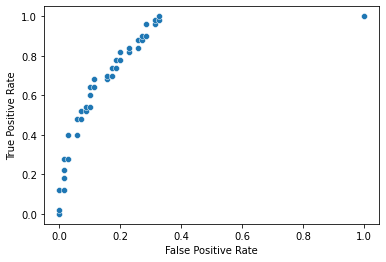

In [94]:
sns.scatterplot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

 ### Multinomial logistic regression
 
- Generalizes logistic regression to multiclass problems
- Decomposed as a set of independent binary logistic regressions

For student's own exploration